In [58]:
import numpy as np
import pandas as pd

In [59]:
df = pd.read_csv("placement.csv")

In [60]:
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [61]:
df = df.iloc[:,1:] #removing unnamed column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [62]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [63]:

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values (cross-validation)
#(divide the data in two parts, train and the other is to test the model)
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model


In [64]:
import matplotlib.pyplot as plt


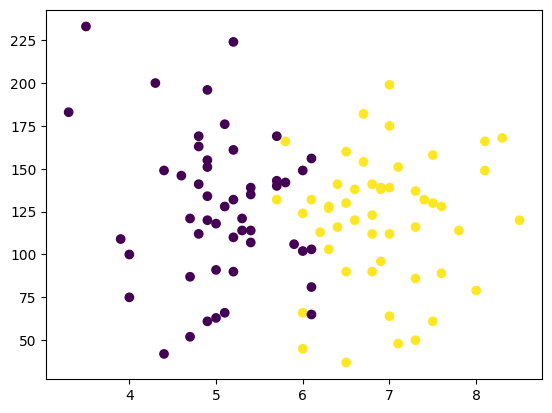

In [65]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"], df["iq"], c = df['placement'])

In [66]:
#logistic regression
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [67]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [68]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [69]:
y.shape

(100,)

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)



In [71]:
X_train

,cgpa,iq
95,4.3,200.0
2,5.3,121.0
88,4.4,149.0
37,8.1,149.0
76,4.9,155.0
...,...,...
54,6.4,141.0
13,6.4,116.0
29,7.0,112.0
30,7.6,128.0


In [72]:
y_test

1     0
18    0
55    1
10    1
0     1
44    1
53    1
39    0
4     0
38    1
Name: placement, dtype: int64

In [73]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.48558042,  1.89934072],
       [-0.58764732, -0.08454536],
       [-1.39578711,  0.61860414],
       [ 1.92656533,  0.61860414],
       [-0.94682056,  0.76927903],
       [ 0.04090584,  0.61860414],
       [ 0.66945901,  1.44731605],
       [ 0.13069915,  0.19169195],
       [-0.67744063, -0.8630323 ],
       [ 0.04090584, -0.00920791],
       [ 0.84904562,  0.36747932],
       [ 1.38780548,  0.84461648],
       [ 1.29801217,  0.19169195],
       [ 0.84904562,  0.34236684],
       [-0.22847409,  0.46792925],
       [ 0.48987239, -0.8630323 ],
       [-0.76723394,  0.09124202],
       [ 1.20821886,  0.31725436],
       [-0.49785401, -0.4361201 ],
       [-0.94682056,  0.24191691],
       [ 0.31028577,  0.06612954],
       [ 0.75925231,  0.41770428],
       [ 1.02863224,  0.6688291 ],
       [ 0.75925231, -0.8630323 ],
       [ 1.20821886, -0.21010777],
       [-2.38351351,  1.47242853],
       [ 0.13069915, -1.49084435],
       [ 0.48987239,  0.14146698],
       [ 2.28573857,

In [75]:
X_test = scaler.transform(X_test)
X_test

array([[-0.04888747, -0.46123259],
       [-1.75496034, -0.61190748],
       [ 1.65718541, -0.26033273],
       [ 0.04090584, -1.99309399],
       [ 0.75925231, -0.03432039],
       [ 1.38780548, -1.59129428],
       [ 2.10615195,  1.0957413 ],
       [-1.21620049,  0.54326669],
       [-0.13868078,  0.44281677],
       [ 0.48987239,  0.89484144]])

In [76]:
#model traning
from sklearn.linear_model import LogisticRegression


In [77]:
clf = LogisticRegression()

In [78]:
clf.fit(X_train,y_train)

LogisticRegression()

In [79]:
y_pred = clf.predict(X_test)

In [80]:
y_test

1     0
18    0
55    1
10    1
0     1
44    1
53    1
39    0
4     0
38    1
Name: placement, dtype: int64

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,y_pred)

0.9

<Axes: >

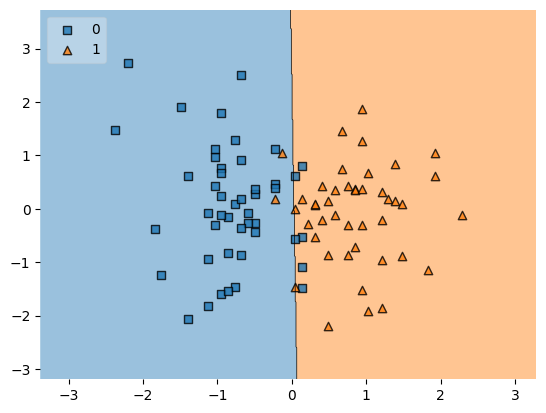

In [83]:
#plotting decision libaray
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [85]:
import pickle

In [86]:
pickle.dump(clf,open('model.pkl','wb'))